In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utils

plt.rcParams['figure.figsize'] = [10, 6.5]

/home/tim/miniconda3/envs/pluto/lib/python3.7/site-packages/pysynphot/units.py:913: RuntimeWarning: divide by zero encountered in true_divide
  normalized = flux / resampled._fluxtable
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


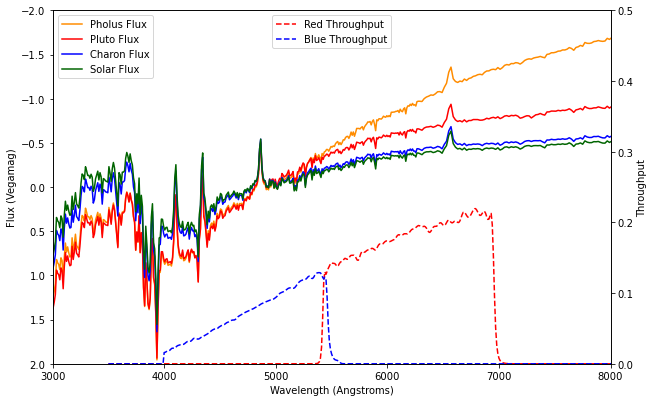

In [3]:
for target in ['pholus', 'pluto', 'charon', 'solar']:
    spectrum = utils.get_spectrum(target)
    spectrum.convert('Angstrom')
    spectrum.convert('vegamag')
    spectrum = spectrum.renorm(0, 'vegamag', utils.get_bandpass('NH_BLUE'))
    plt.plot(
        spectrum.wave, 
        spectrum.flux, 
        label=f"{utils.LABELMAP[target]} Flux",
        color=utils.COLORMAP[target],
    )

plt.xlim([3000, 8000])
plt.xlabel("Wavelength (Angstroms)")
    
spec_ax = plt.gca()
spec_ax.set_ylim(-2, 2)
spec_ax.set_ylabel("Flux (Vegamag)")
spec_ax.legend(loc='upper left')
spec_ax.invert_yaxis()

bp_ax = spec_ax.twinx() # Make a second y-axis that shares the x-axis
red_bp = utils.get_bandpass('NH_RED')
bp_ax.plot(
    red_bp.wave, red_bp.throughput, 
    '--', c=utils.COLORMAP['NH_RED'], 
    label=f"{utils.LABELMAP['NH_RED']} Throughput")

blue_bp = utils.get_bandpass('NH_BLUE')
bp_ax.plot(
    blue_bp.wave, blue_bp.throughput, 
    '--', c=utils.COLORMAP['NH_BLUE'], 
    label=f"{utils.LABELMAP['NH_BLUE']} Throughput")

bp_ax.set_ylim(0, 0.5)
bp_ax.set_ylabel("Throughput")
bp_ax.legend(loc='upper center')

plt.savefig(f"figures/spectra_with_throughput.eps", bbox_inches='tight')
plt.show()

/home/tim/miniconda3/envs/pluto/lib/python3.7/site-packages/pysynphot/units.py:913: RuntimeWarning: divide by zero encountered in true_divide
  normalized = flux / resampled._fluxtable
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


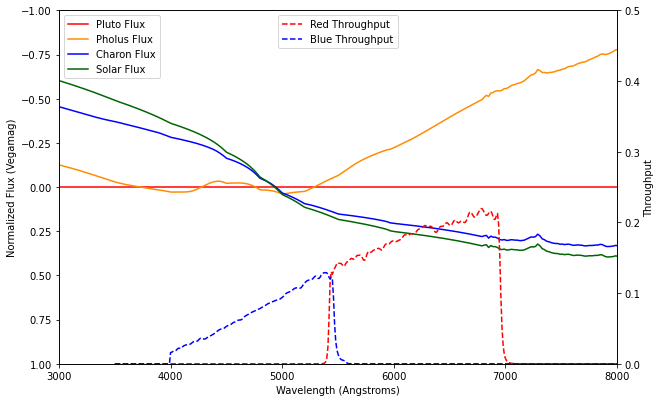

In [4]:
pluto_spectrum = utils.get_spectrum('pluto')
pluto_spectrum.convert('Angstrom')
pluto_spectrum.convert('vegamag')
pluto_spectrum = pluto_spectrum.renorm(0, 'vegamag', utils.get_bandpass('NH_BLUE'))

for target in ['pluto', 'pholus', 'charon', 'solar']:
    spectrum = utils.get_spectrum(target)
    spectrum.convert('Angstrom')
    spectrum.convert('vegamag')
    spectrum = spectrum.renorm(0, 'vegamag', utils.get_bandpass('NH_BLUE'))
    
    flux = np.interp(pluto_spectrum.wave, spectrum.wave, spectrum.flux)
    
    plt.plot(
        pluto_spectrum.wave, 
        flux - pluto_spectrum.flux, 
        label=f"{utils.LABELMAP[target]} Flux",
        color=utils.COLORMAP[target],
    )

plt.xlim([3000, 8000])
plt.xlabel("Wavelength (Angstroms)")
    
spec_ax = plt.gca()
spec_ax.set_ylim(-1, 1)
spec_ax.set_ylabel("Normalized Flux (Vegamag)")
spec_ax.legend(loc='upper left')
spec_ax.invert_yaxis()
    
bp_ax = spec_ax.twinx() # Make a second y-axis that shares the x-axis
red_bp = utils.get_bandpass('NH_RED')
bp_ax.plot(
    red_bp.wave, red_bp.throughput, 
    '--', c=utils.COLORMAP['NH_RED'], 
    label=f"{utils.LABELMAP['NH_RED']} Throughput")

blue_bp = utils.get_bandpass('NH_BLUE')
bp_ax.plot(
    blue_bp.wave, blue_bp.throughput, 
    '--', c=utils.COLORMAP['NH_BLUE'], 
    label=f"{utils.LABELMAP['NH_BLUE']} Throughput")
bp_ax.set_ylim(0, 0.5)
bp_ax.set_ylabel("Throughput")
bp_ax.legend(loc='upper center')
    
plt.xlim([3000, 8000])
plt.xlabel("Wavelength (Angstroms)")

plt.savefig(f"figures/spectra_norm_with_throughput.eps", bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


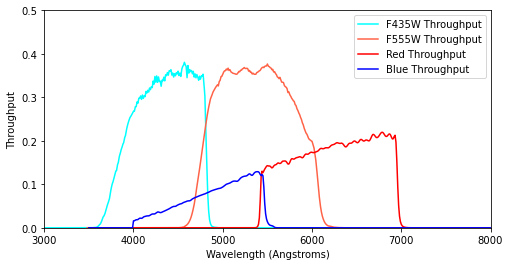

In [5]:
plt.rcParams['figure.figsize'] = [8, 4]

for bp_name in ['HST_F435W', 'HST_F555W', 'NH_RED', 'NH_BLUE']:
    bp = utils.get_bandpass(bp_name)
    plt.plot(
        bp.wave, bp.throughput, 
        c=utils.COLORMAP[bp_name], 
        label=f"{utils.LABELMAP[bp_name]} Throughput")
    
plt.xlim([3000, 8000])
plt.ylim(0, 0.5)

plt.legend()
plt.xlabel("Wavelength (Angstroms)")
plt.ylabel("Throughput")
plt.savefig(f"figures/bandpasses.eps", bbox_inches='tight')
plt.show()